<a href="https://colab.research.google.com/github/maviayten/karar_a-a-lar-_uygulamalar-/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Gerekli kütüphanelerin içe aktarılması
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Veri setinin yüklenmesi
iris_dataset = load_iris()
iris_data = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)

# Hedef değişkeni ekleme
iris_data['target'] = iris_dataset.target

# Veri setinin ilk birkaç satırını göster
iris_data.head()

# Veri setinin genel yapısını inceleme
# Veri setinin boyutlarını yazdır
print("Veri setinin boyutları:", iris_data.shape)

# Her sütunda eksik değer sayısını kontrol et
print("\nSütunlardaki eksik değer sayıları:")
missing_values = iris_data.isnull().sum()
print(missing_values)

# Her sütunun veri tipini kontrol et
print("\nSütunların veri tipleri:")
print(iris_data.dtypes)


Veri setinin boyutları: (150, 5)

Sütunlardaki eksik değer sayıları:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Sütunların veri tipleri:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


In [8]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temel İstatistiklerin İncelenmesi
# Veri setinin temel istatistiklerini göster
print("Temel İstatistikler:\n", iris_data.describe())




Temel İstatistikler:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris
import pandas as pd

# Iris veri setini yükleme
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost sınıflandırıcısını oluşturma
ada_clf = AdaBoostClassifier(random_state=42)

# Modeli eğitim verileri üzerinde eğitme
ada_clf.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma ve performans değerlendirme
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Doğruluk Oranı:", accuracy)
print("\nSınıflandırma Raporu:\n", report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Doğruluk Oranı: 1.0

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Veri setinin yüklenmesi
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost sınıflandırıcısını oluşturma, base_estimator parametresini ayarlama
# Doğru parametre 'estimator' olacak
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# GridSearchCV için parametreler
param_grid = {
    'estimator__max_depth': [1, 2, 3],  # Karar ağacının maksimum derinliği
    'n_estimators': [50, 100, 200],          # Zayıf sınıflandırıcı sayısı
    'learning_rate': [0.01, 0.1, 1]          # Öğrenme oranı
}

# GridSearchCV ile parametreleri arama
grid_search = GridSearchCV(ada_clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# En iyi parametreler ve en iyi skor
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Sonuçları yazdırma
print("En İyi Parametreler:", best_parameters)
print("En İyi Skor:", best_score)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

En İyi Parametreler: {'estimator__max_depth': 1, 'learning_rate': 1, 'n_estimators': 100}
En İyi Skor: 0.942857142857143


In [18]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Modeli en iyi parametrelerle yeniden eğitme
best_ada_clf = grid_search.best_estimator_
best_ada_clf.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = best_ada_clf.predict(X_test)

# Performans metriklerini hesaplama
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Doğruluk (Accuracy): 1.0
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



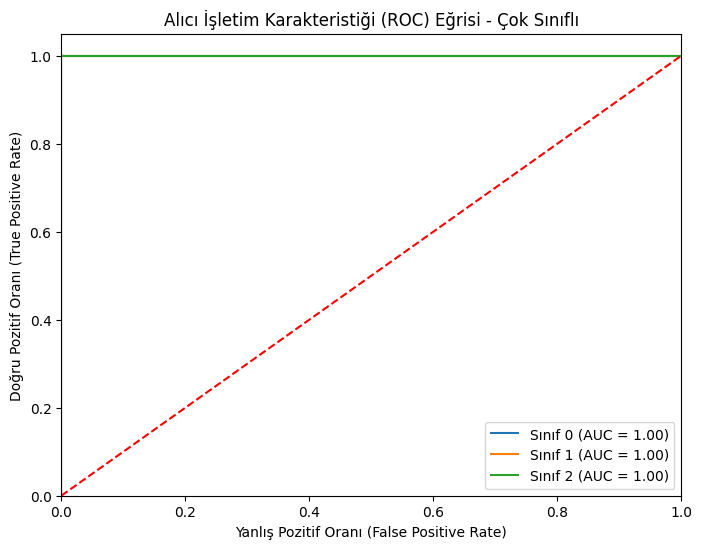

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Çok sınıflı veriler için y_test'i one-vs-rest formatına dönüştürme
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Tahmin edilen olasılıkları al
y_pred_proba = best_ada_clf.predict_proba(X_test)

# AUC hesaplamak ve ROC eğrisini çizmek için her sınıf için
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Her bir sınıf için ROC eğrisini hesapla
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

# ROC Eğrisini çizme
plt.figure(figsize=(8, 6))

# Her sınıf için ROC eğrisini çiz
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Sınıf {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')  # Rasgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate)')
plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi - Çok Sınıflı')
plt.legend(loc="lower right")
plt.show()
